In [32]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [33]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 40654 files belonging to 22 classes.


In [34]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 10162 files belonging to 22 classes.


In [35]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 22), dtype=tf.float32, name=None))>

In [36]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 77.25  67.75  78.25]
   [133.5  120.5  138.  ]
   [144.25 131.5  151.5 ]
   ...
   [144.   138.   164.  ]
   [145.   139.   165.  ]
   [151.   145.   171.  ]]

  [[ 74.5   64.    81.5 ]
   [130.   117.25 136.25]
   [145.75 135.25 151.  ]
   ...
   [152.   146.   172.  ]
   [161.   155.   181.  ]
   [151.25 145.25 171.25]]

  [[ 66.75  56.25  81.  ]
   [133.5  122.5  142.5 ]
   [141.25 134.   141.  ]
   ...
   [142.75 136.75 162.75]
   [142.5  136.5  162.5 ]
   [133.   127.   153.  ]]

  ...

  [[ 64.5   54.    73.5 ]
   [123.   109.   135.  ]
   [127.   112.   143.  ]
   ...
   [144.75 139.75 169.75]
   [144.25 139.25 169.25]
   [144.75 139.75 169.75]]

  [[ 66.25  55.5   75.25]
   [125.25 111.25 137.25]
   [125.   110.   141.  ]
   ...
   [153.25 148.25 178.25]
   [157.   152.   182.  ]
   [155.25 150.25 180.25]]

  [[ 68.75  57.    77.75]
   [128.   114.   140.  ]
   [125.25 110.25 141.25]
   ...
   [144.25 139.25 169.25]
   [142.25 137.25 167.25]
   [146.75 141.75 17

In [37]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [38]:
model = Sequential()

In [39]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [40]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [41]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [42]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [43]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [44]:
model.add(Flatten())

In [45]:
model.add(Dense(units=1500,activation='relu'))

In [46]:
model.add(Dropout(0.4))

In [47]:
#Output Layer
model.add(Dense(units=22,activation='softmax'))

In [48]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │      13,825,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 22)                  │          33,022 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,030,778 (57.34 MB)

 Trainable params: 15,030,778 (57.34 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=6)

Epoch 1/6
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 1841s 1s/step - accuracy: 0.5398 - loss: 1.5010 - val_accuracy: 0.8529 - val_loss: 0.4536
Epoch 2/6
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 1747s 1s/step - accuracy: 0.8624 - loss: 0.4115 - val_accuracy: 0.8930 - val_loss: 0.2975
Epoch 3/6
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 1760s 1s/step - accuracy: 0.9141 - loss: 0.2551 - val_accuracy: 0.9281 - val_loss: 0.2157
Epoch 4/6
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 1777s 1s/step - accuracy: 0.9414 - loss: 0.1743 - val_accuracy: 0.9337 - val_loss: 0.1959
Epoch 5/6
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 1878s 1s/step - accuracy: 0.9511 - loss: 0.1452 - val_accuracy: 0.9260 - val_loss: 0.2312
Epoch 6/6
1271/1271 ━━━━━━━━━━━━━━━━━━━━ 1782s 1s/step - accuracy: 0.9632 - loss: 0.1070 - val_accuracy: 0.9624 - val_loss: 0.1208


In [51]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

1271/1271 ━━━━━━━━━━━━━━━━━━━━ 337s 265ms/step - accuracy: 0.9901 - loss: 0.0316


In [52]:
print(train_loss,train_acc)

0.02627519518136978 0.9922270774841309


In [53]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

318/318 ━━━━━━━━━━━━━━━━━━━━ 88s 277ms/step - accuracy: 0.9618 - loss: 0.1233


In [54]:
print(val_loss,val_acc)

0.12077513337135315 0.9624089598655701


In [55]:
model.save("trained_model.keras")

In [56]:
training_history.history

{'accuracy': [0.7005460858345032,
  0.8826683759689331,
  0.9242632985115051,
  0.947360634803772,
  0.9582083225250244,
  0.9681212306022644],
 'loss': [0.9337818026542664,
  0.34989872574806213,
  0.22387437522411346,
  0.15487293899059296,
  0.12162338197231293,
  0.09418602287769318],
 'val_accuracy': [0.8528832793235779,
  0.8930328488349915,
  0.9280653595924377,
  0.9336744546890259,
  0.9259988069534302,
  0.9624089598655701],
 'val_loss': [0.45357638597488403,
  0.2975430488586426,
  0.21573935449123383,
  0.19585785269737244,
  0.23120424151420593,
  0.12077514082193375]}

In [57]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [58]:
training_history.history['val_accuracy']

[0.8528832793235779,
 0.8930328488349915,
 0.9280653595924377,
 0.9336744546890259,
 0.9259988069534302,
 0.9624089598655701]

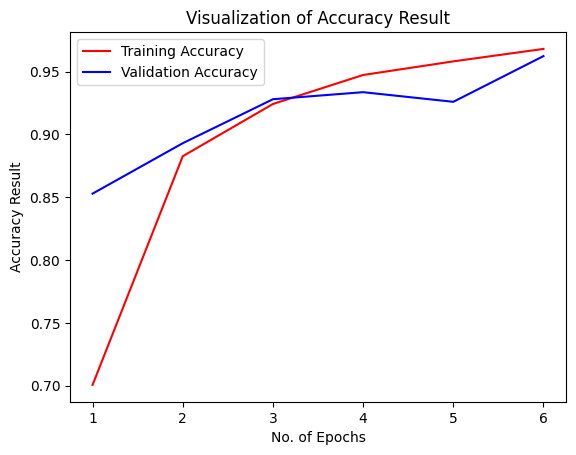

In [61]:
epochs = [i for i in range(1,7)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [62]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [63]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 10162 files belonging to 22 classes.


In [64]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

318/318 ━━━━━━━━━━━━━━━━━━━━ 94s 295ms/step


(array([[9.9989998e-01, 4.9972990e-05, 1.5400817e-13, ..., 1.4635903e-12,
         1.2256086e-14, 2.4909963e-11],
        [9.9999642e-01, 3.1766449e-06, 1.1348555e-11, ..., 1.6879287e-16,
         3.3336062e-14, 2.7980385e-13],
        [9.9984419e-01, 1.5177228e-04, 6.7773252e-11, ..., 1.0471445e-15,
         2.4553096e-12, 4.7952586e-11],
        ...,
        [3.1706540e-09, 9.3938934e-10, 9.9080166e-09, ..., 8.0562312e-10,
         2.1549222e-10, 9.9997938e-01],
        [4.6588920e-07, 1.0515527e-08, 4.1729544e-09, ..., 6.7021015e-09,
         4.2566516e-11, 9.9999809e-01],
        [2.2893807e-13, 1.9424579e-12, 5.6191132e-12, ..., 2.3248523e-13,
         1.4872918e-10, 9.9999881e-01]], dtype=float32),
 (10162, 22))

In [65]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [66]:
predicted_categories

<tf.Tensor: shape=(10162,), dtype=int64, numpy=array([ 0,  0,  0, ..., 21, 21, 21])>

In [67]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(10162, 22), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [68]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(10162,), dtype=int64, numpy=array([ 0,  0,  0, ..., 21, 21, 21])>

In [69]:
from sklearn.metrics import classification_report,confusion_matrix

In [70]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.91      0.94       504
                                 Apple___Black_rot       0.94      0.99      0.97       497
                          Apple___Cedar_apple_rust       1.00      0.97      0.99       440
                                   Apple___healthy       0.96      0.98      0.97       502
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.90      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.97      0.95       477
                            Corn_(maize)___healthy       1.00      1.00      1.00       465
                                 Grape___Black_rot       0.96      0.97      0.97       472
                      Grape___Esca_(Black_Measles)       0.97      0.98      0.

In [71]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[458,  22,   0,  10,   1,   0,   0,   0,   0,   0,   0,   2,   1,
          0,   0,   5,   2,   0,   2,   0,   1,   0],
       [  0, 493,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 429,   0,   0,   0,   0,   0,   1,   0,   1,   0,   2,
          0,   4,   0,   3,   0,   0,   0,   0,   0],
       [  2,   0,   0, 493,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   1,   2,   1,   2,   0,   0,   0],
       [  2,   0,   0,   0, 371,   1,  30,   0,   0,   0,   0,   0,   1,
          0,   4,   0,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   3, 472,   0,   0,   0,   0,   0,   0,   0,
          0,   2,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,  12,   0, 461,   1,   0,   0,   0,   0,   0,
          0,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 465,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 

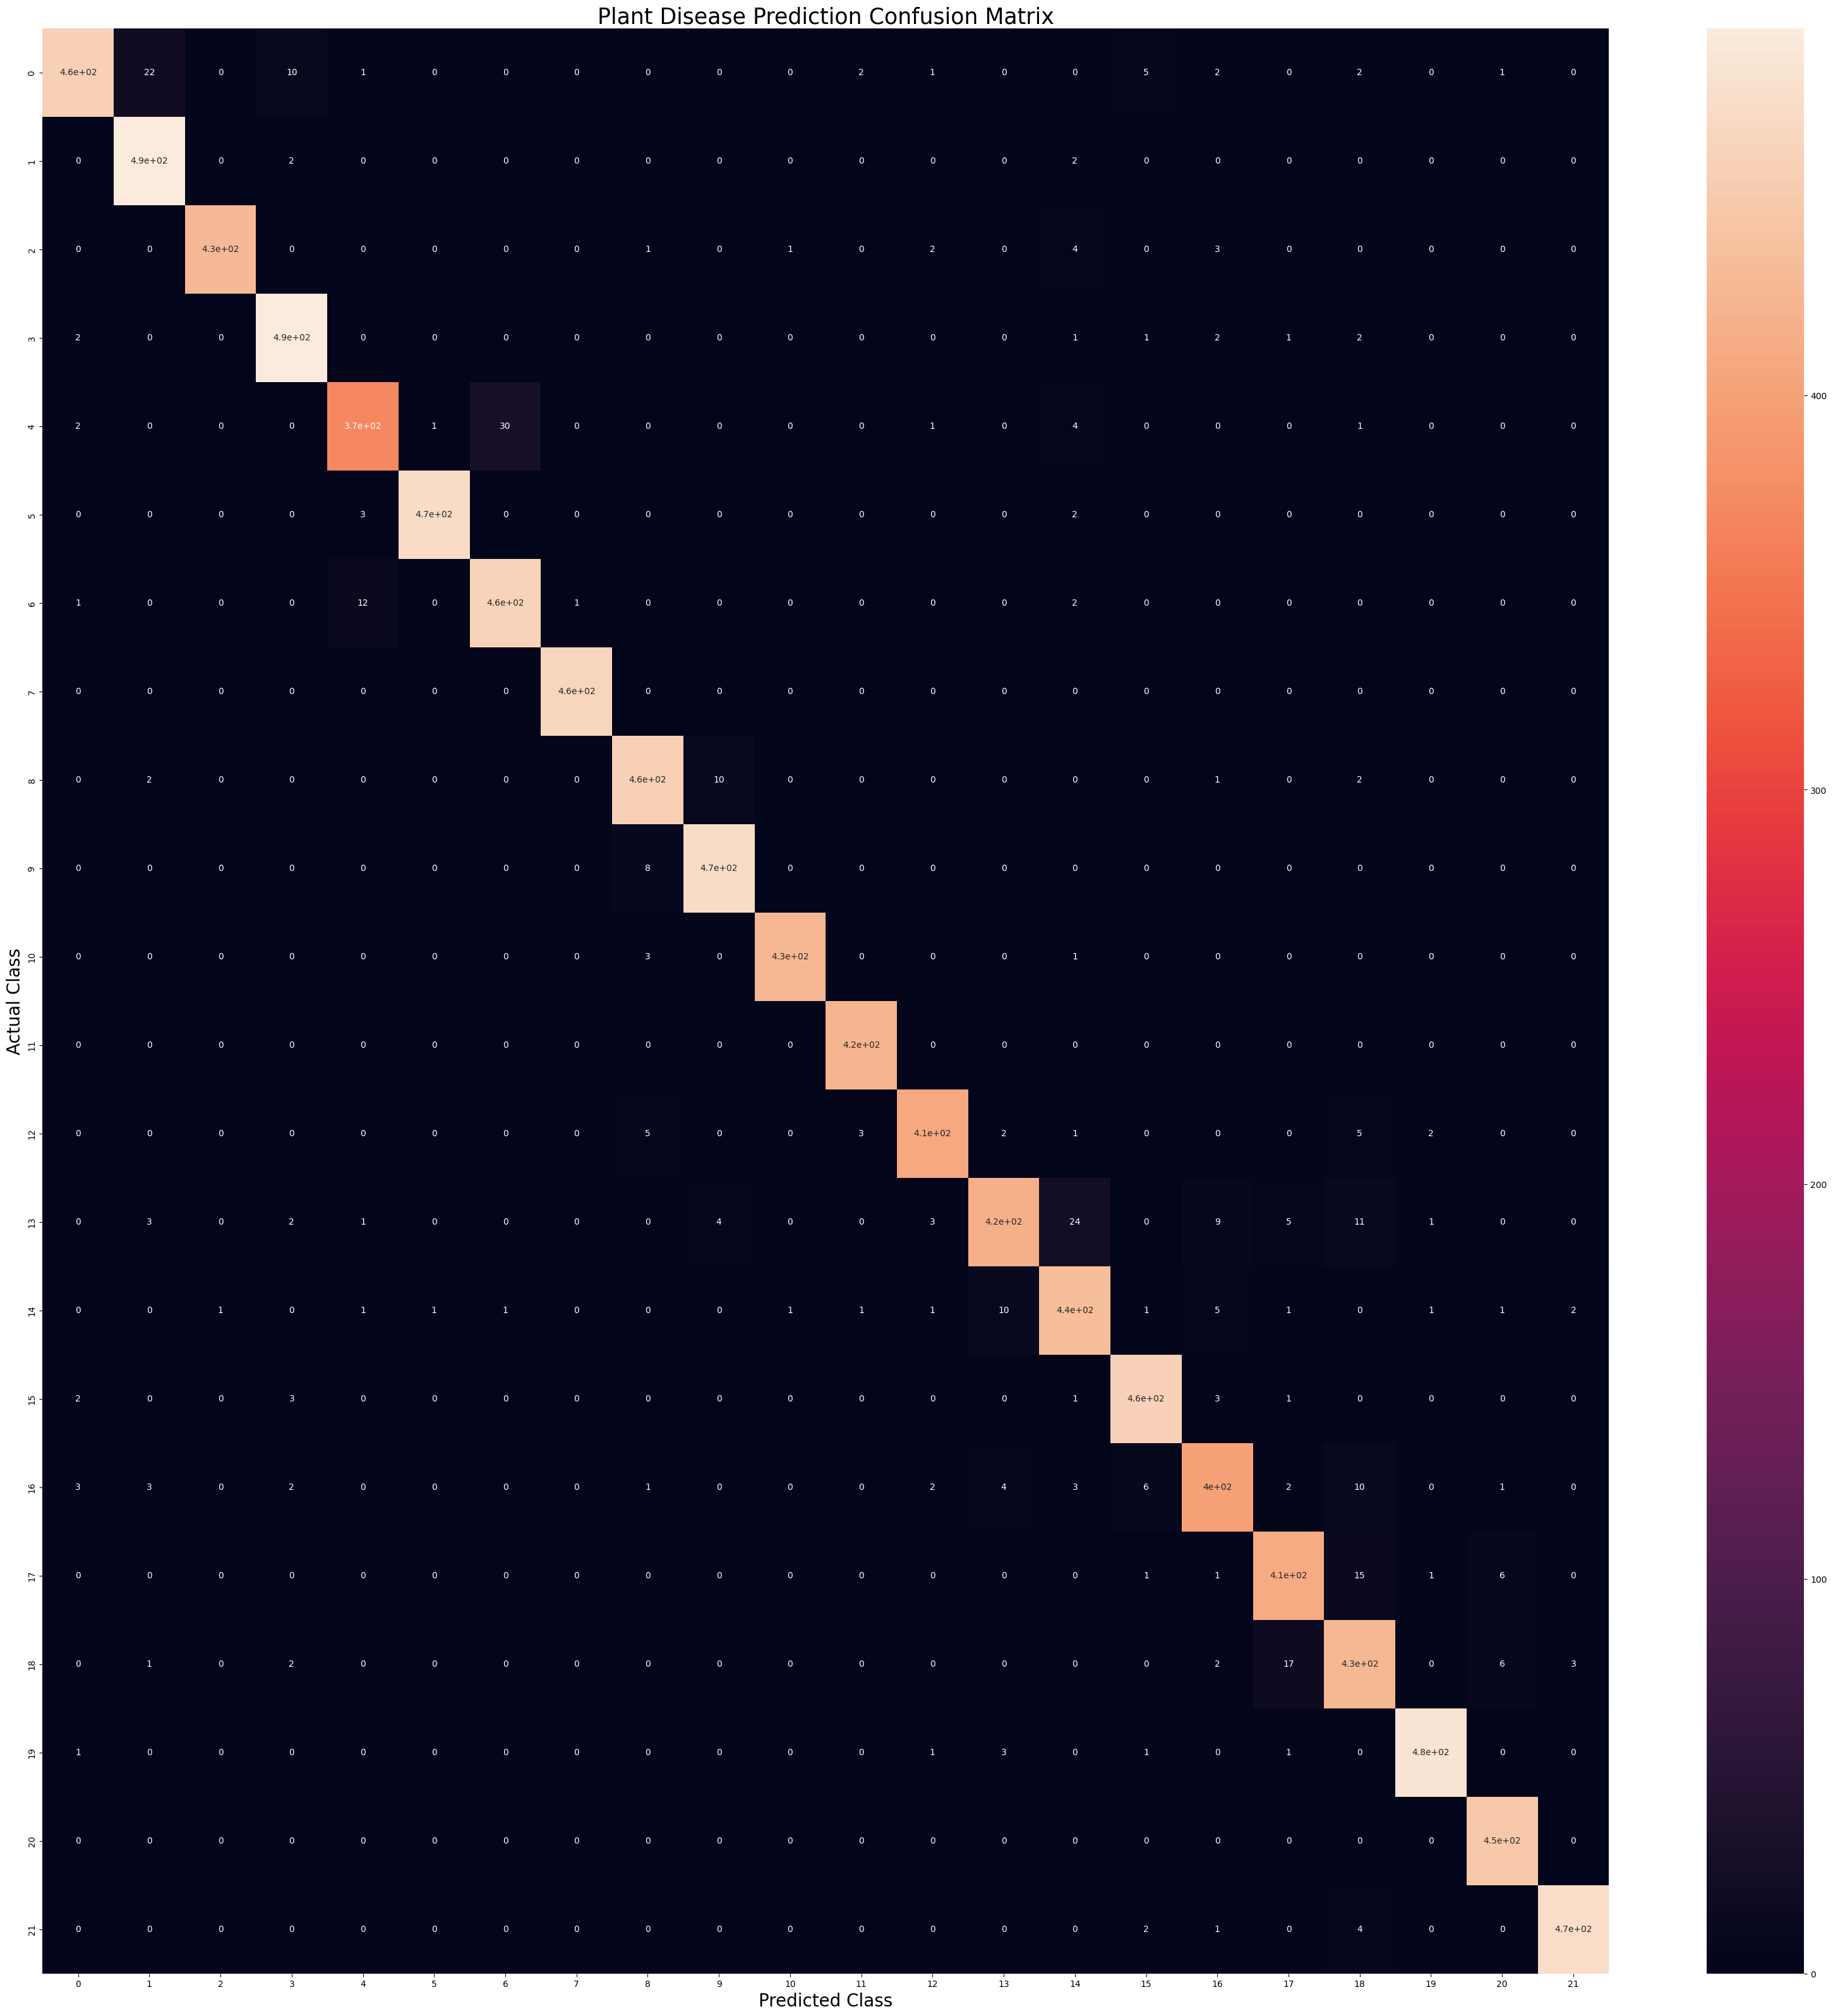

In [72]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()